In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
PATH = '/generated-embeddings/'
reps = pd.read_csv(PATH+'reps.csv', header=None)
labels = pd.read_csv(PATH+'names.csv', header=None)

In [3]:
# 降维
mds = MDS(n_components=2)
low_reps = mds.fit_transform(reps)

In [38]:
h_labels = labels.loc[0:22][0]
h_reps = low_reps[0:23]
n_labels = labels.loc[23:43][0]
n_reps = low_reps[23:44]
x_labels = labels.loc[44:64][0]
x_reps = low_reps[44:65]
s_labels = labels.loc[65:][0]
s_reps = low_reps[65:]
assert len(h_labels) == len(h_reps)
assert len(n_labels) == len(n_reps)
assert len(s_labels) == len(s_reps)

In [55]:
def Sim_plot(low_reps, labels):
    N = len(low_reps)
    fig, ax = plt.subplots(figsize=(20,10))
    colors = np.random.randn(N)
    ax.scatter(low_reps[:,0],low_reps[:,1],s=360,c=colors)
    for i, txt in enumerate(labels):
        ax.annotate(txt, (low_reps[i,0]-0.001,low_reps[i,1]+0.02),size=20)

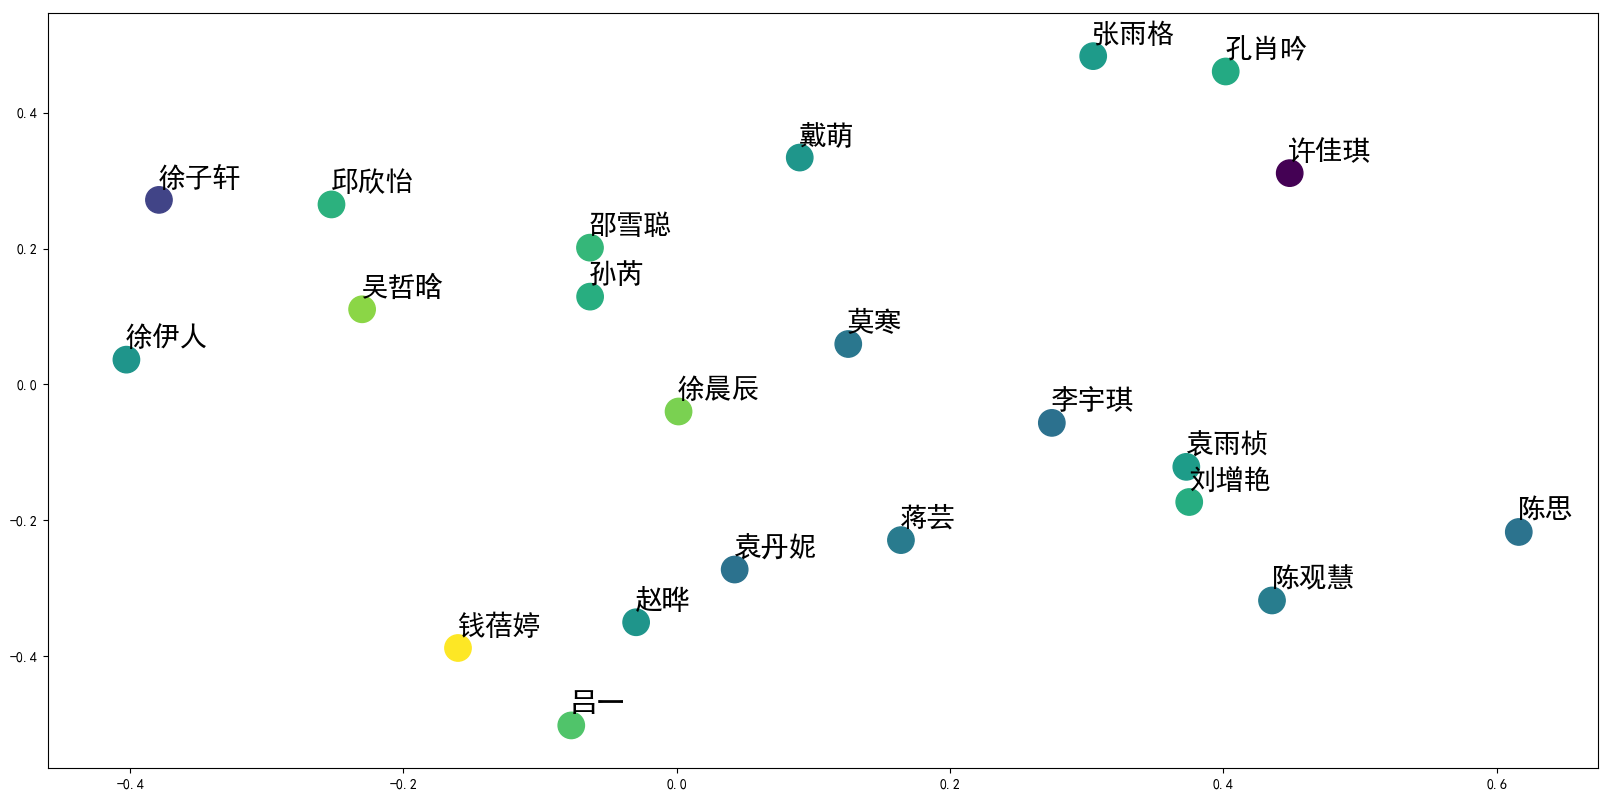

In [56]:
Sim_plot(s_reps, s_labels)

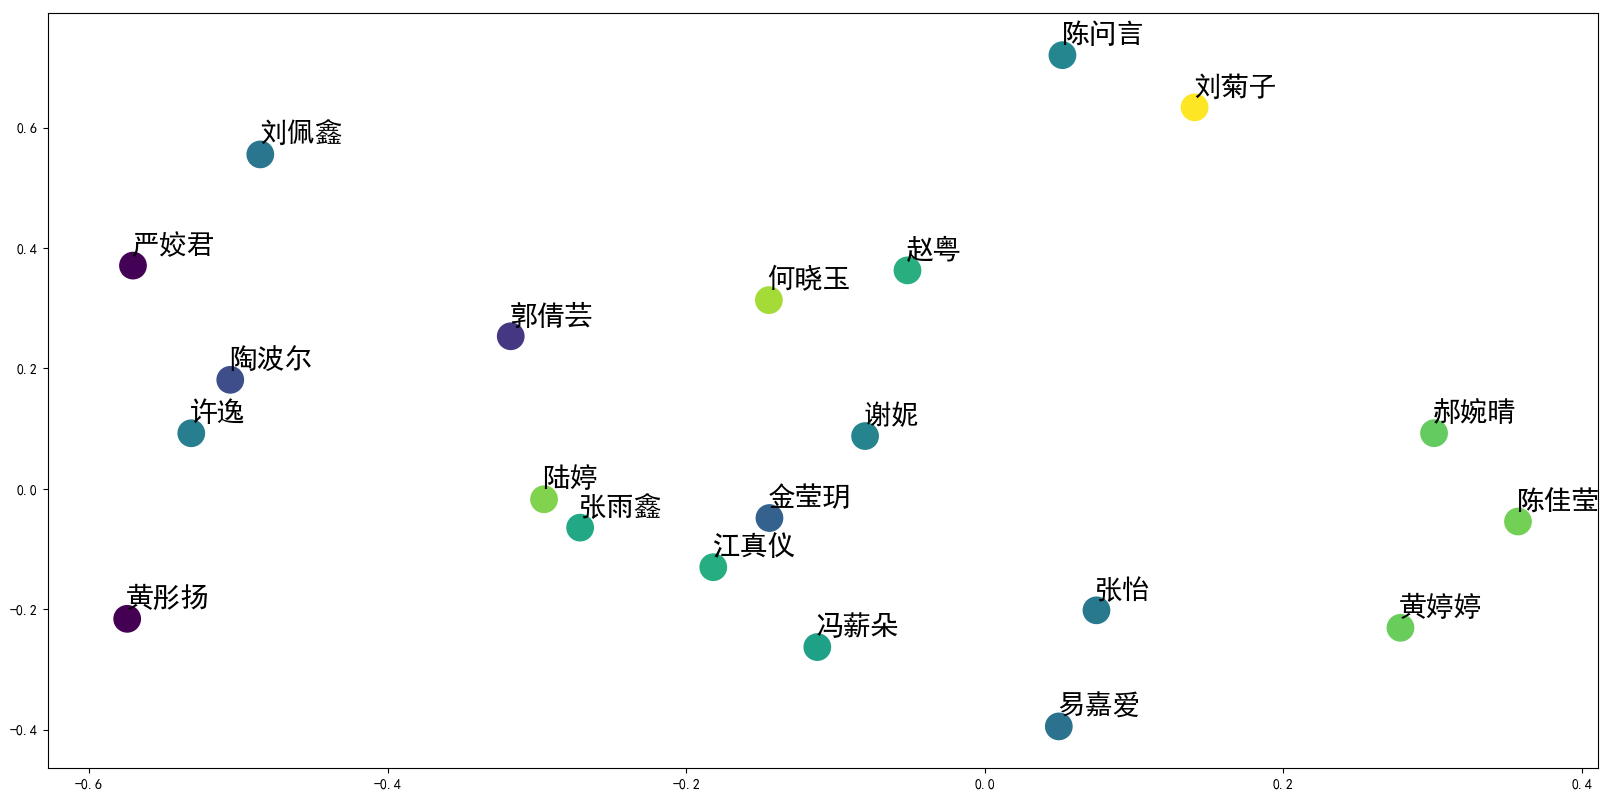

In [57]:
Sim_plot(n_reps, n_labels)

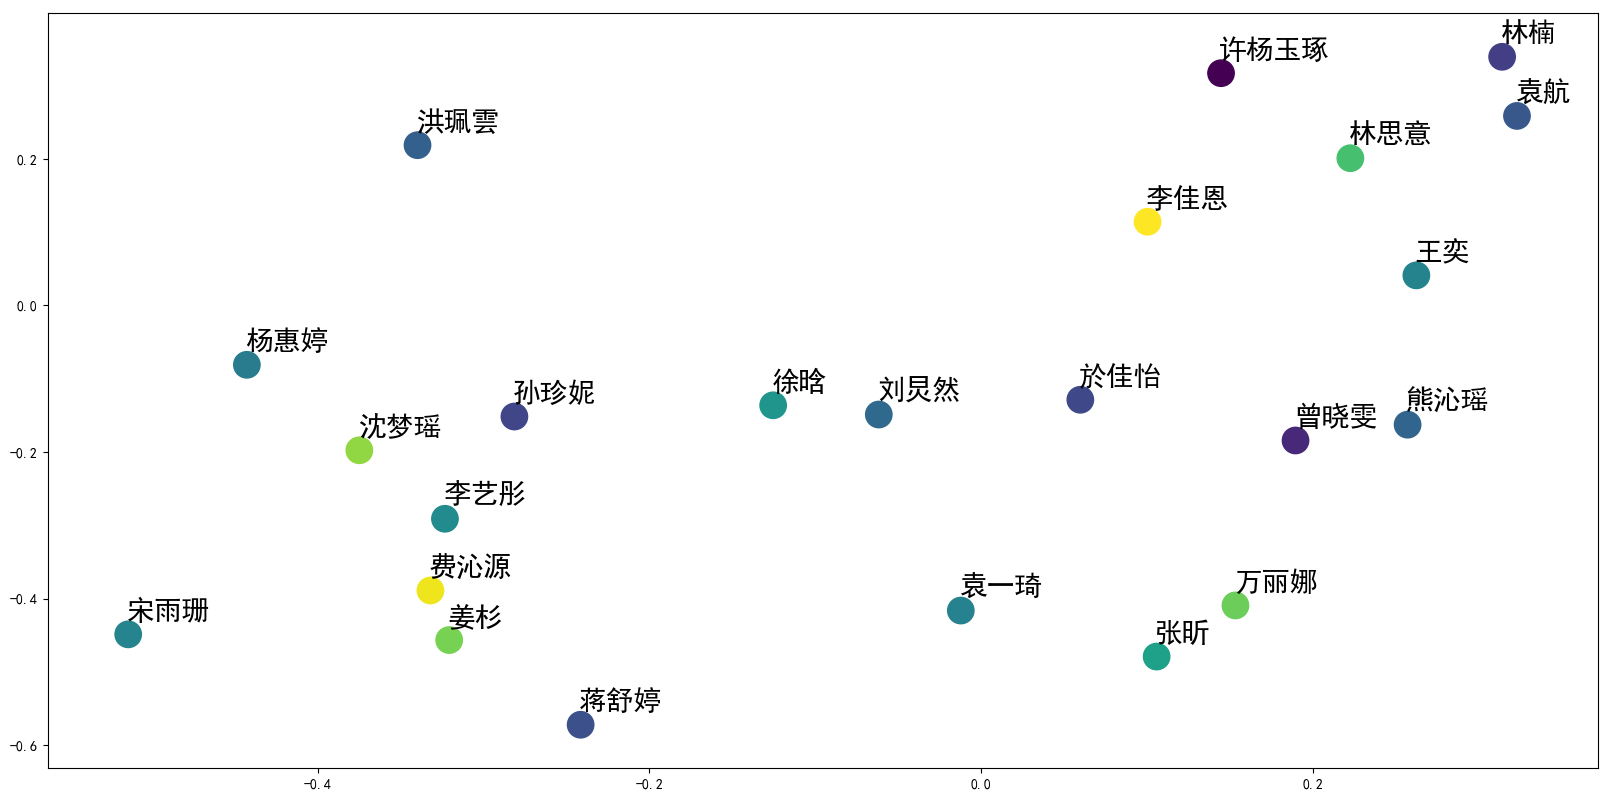

In [58]:
Sim_plot(h_reps, h_labels)

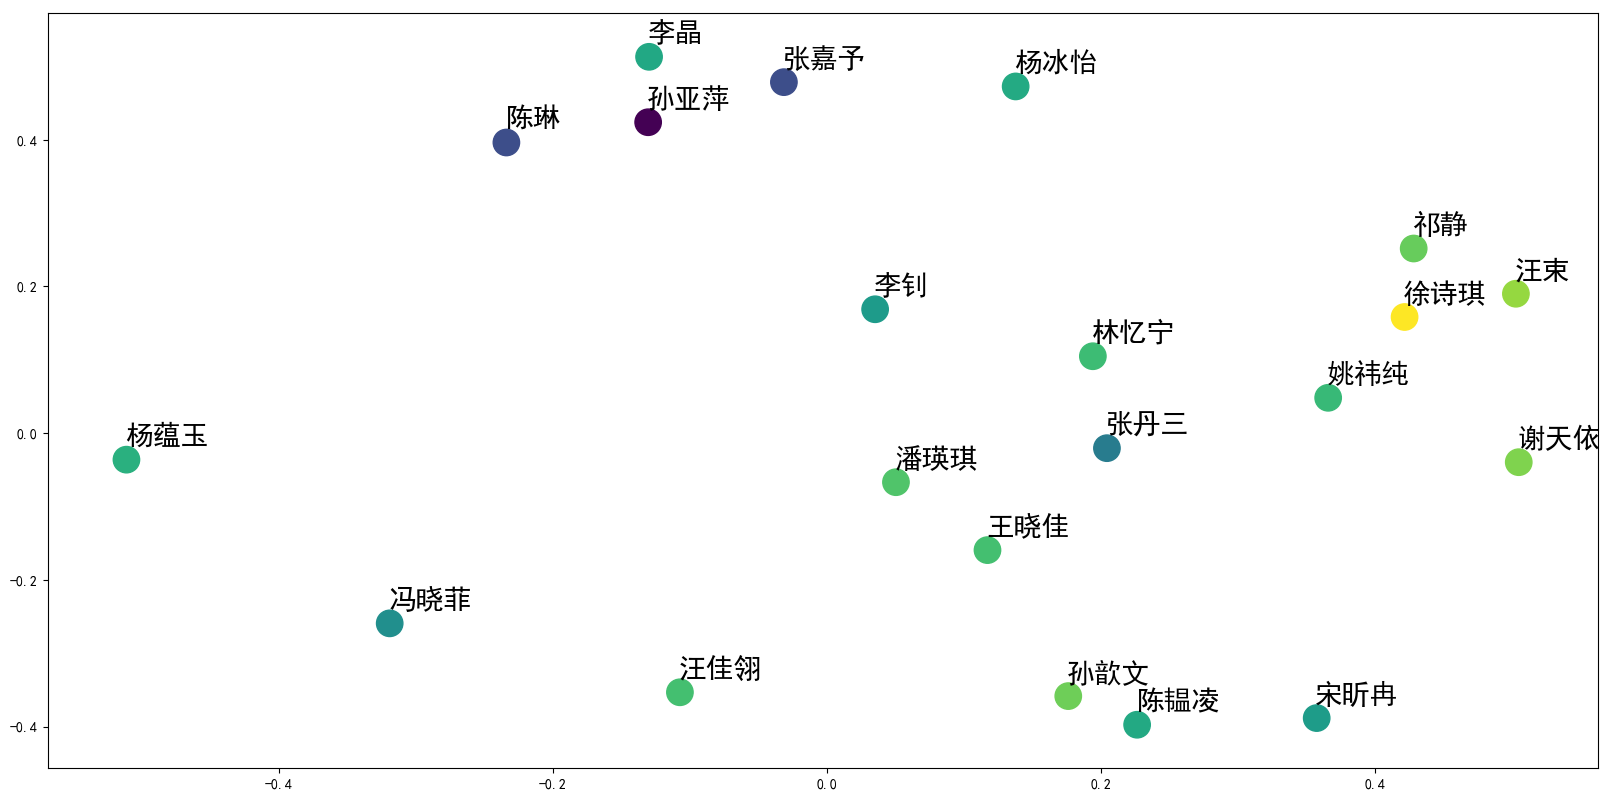

In [59]:
Sim_plot(x_reps, x_labels)

In [60]:
# Similarity Ranking
N = len(reps[0])
sim_df = pd.DataFrame(columns=['Name1','Name2','Similarity'])        

In [61]:
name1 = []
name2 = []
sim = []
for i in range(N):
    rep1=reps.loc[i]
    for j in range(i+1,N):
        rep2=reps.loc[j]
        sim.append(np.linalg.norm(rep1 - rep2))
        name1.append(labels.loc[i][0])
        name2.append(labels.loc[j][0])
sim_df['Name1'] = name1
sim_df['Name2'] = name2
sim_df['Similarity'] = sim

In [71]:
tmp = sim_df.sort_values(by=['Similarity']).head()
tmp.index = np.arange(1,6)
tmp

,Name1,Name2,Similarity
1,刘炅然,江真仪,0.233523
2,曾晓雯,蒋芸,0.256188
3,曾晓雯,孙歆文,0.273563
4,张怡,王晓佳,0.274143
5,刘炅然,张怡,0.284767


In [70]:
tmp = sim_df.sort_values(by=['Similarity']).tail().sort_values(by=['Similarity'],ascending=False)
tmp.index = np.arange(1,6)
tmp

,Name1,Name2,Similarity
1,宋雨珊,孔肖吟,1.079329
2,刘佩鑫,陈思,1.025186
3,刘佩鑫,陈观慧,1.010084
4,蒋舒婷,陈问言,0.993894
5,宋雨珊,徐诗琪,0.990566


In [72]:
# Averge face
mean_reps = reps.mean()

In [100]:
# Most common
average_face = np.square(np.sum(np.square(reps - mean_reps),axis=1))
average_face.index = labels[0]
tmp = average_face.sort_values().head()
tmp_df = pd.DataFrame(columns=['Name', 'Similarity'])
tmp_df['Name'] = tmp.index
tmp_df['Similarity'] = [i for i in tmp]
tmp_df

,Name,Similarity
0,莫寒,0.004998
1,刘炅然,0.005571
2,孙芮,0.005932
3,潘瑛琪,0.006838
4,张怡,0.008090


In [106]:
# Most special
tmp = average_face.sort_values().tail().sort_values(ascending=False)
tmp_df = pd.DataFrame(columns=['Name', 'Similarity'])
tmp_df['Name'] = tmp.index
tmp_df['Similarity'] = [i for i in tmp]
tmp_df

,Name,Similarity
0,刘佩鑫,0.240067
1,陈问言,0.213110
2,严姣君,0.172878
3,宋雨珊,0.160536
4,刘菊子,0.140533


In [148]:
# 马鹿
# 戴莫
# 七五折
# 黑喵
# 闷叉
# 九笨
# 三蕴
# 水灰
# 航兽
# 艾斯
# 肖钱
# 龟鱼
# 源杉
def cp_sim(name1, name2):
    sim1 = sim_df.loc[(sim_df['Name1']==name1)].loc[sim_df['Name2']==name2]['Similarity']
    sim2 = sim_df.loc[(sim_df['Name2']==name1)].loc[sim_df['Name1']==name2]['Similarity']
    if sim1.empty:
        return sim2.values[0]
    else:
        return sim1.values[0]

In [149]:
cp = []
_cp_sim = []
cp.append('马鹿')
_cp_sim.append(cp_sim('冯薪朵','陆婷'))
cp.append('戴莫')
_cp_sim.append(cp_sim('戴萌','莫寒'))
cp.append('七五折')
_cp_sim.append(cp_sim('许佳琪','吴哲晗'))
cp.append('黑喵')
_cp_sim.append(cp_sim('袁一琦','沈梦瑶'))
cp.append('闷叉')
_cp_sim.append(cp_sim('郝婉晴','张雨鑫'))
cp.append('九笨')
_cp_sim.append(cp_sim('谢天依','汪佳翎'))
cp.append('三蕴')
_cp_sim.append(cp_sim('张丹三','杨蕴玉'))
cp.append('水灰')
_cp_sim.append(cp_sim('杨冰怡','冯晓菲'))
cp.append('航兽')
_cp_sim.append(cp_sim('袁航','刘炅然'))
cp.append('肖钱')
_cp_sim.append(cp_sim('孔肖吟','钱蓓婷'))
cp.append('龟鱼')
_cp_sim.append(cp_sim('徐晗','刘佩鑫'))
cp.append('卡黄')
_cp_sim.append(cp_sim('黄婷婷','李艺彤'))

In [157]:
cp_df = pd.DataFrame(columns=['CP', 'Similarity'])
cp_df['CP'] = cp
cp_df['Similarity'] = _cp_sim
sort_cp_df = cp_df.sort_values(by='Similarity')
sort_cp_df.index=np.arange(1,13)
sort_cp_df

,CP,Similarity
1,马鹿,0.388787
2,戴莫,0.479280
3,卡黄,0.499368
4,黑喵,0.550650
5,闷叉,0.599853
6,航兽,0.613742
7,九笨,0.650976
8,三蕴,0.667329
9,七五折,0.674251
10,水灰,0.674496
